# New Items for the Next Exam 3
JP Sabini April 13 CU

exam 3:
ch2-9, phtyhon pandas,  will be short data sets, no taxi. Review next week.

### Vectorizing String Functions Sec 7.3
#### Why is this important?  Don't do loops in Pandas. There are mechanisms that allow for what is called functional programming  that permit very efficent iteration of functions over data. Think of this as sending a function to the data , the function operated on the data place. There is no extraction of data elements and assignments like in a loop. 
####  We saw that you can apply string functions efficently to each element of a df or a series, but this will fail when the function expecting a string type encounters a NaN. Series has a numpy like ability to overcome NaN induced errors for strings. For this we use the   "str"  attribute. It is used only for Series (cloumns) of a data frame.

Vectorized string methods can be found on Pages 218 of Wes McKinney  and are similar to what we saw in standard python on Chapter 8 and page 420 of Gaddis.

In [1]:
import pandas as pd
import numpy as np



In [2]:
from IPython.display import display,HTML

### Vectorized String Functions in pandas the str attribute

In [7]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',\
        'Rob': 'rob@gmail.com', 'Wes': np.nan}

data = pd.Series(data)

data



Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [8]:
# note str.
data.isnull()
data.str.contains('gmail')



Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

One strength of Python is its relative ease in handling and manipulating string data. Pandas builds on this and provides a comprehensive set of vectorized string operations that become an essential piece of the type of munging required when working with (read: cleaning up) real-world data. In this section, we'll walk through some of the Pandas string operations, and then take a look at using them to partially clean up a very messy dataset of recipes collected from the Internet.
Introducing Pandas String Operations

We saw in previous sections how tools like NumPy and Pandas generalize arithmetic operations so that we can easily and quickly perform the same operation on many array elements. For example:


In [3]:
# a vectorization

x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [4]:
#This vectorization of operations simplifies the syntax of operating on arrays of data: we no longer have to worry about the size or shape of the array, but just about what operation we want done. For arrays of strings, NumPy does not provide such simple access, and thus you're stuck using a more verbose loop syntax:

data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]



['Peter', 'Paul', 'Mary', 'Guido']

In [10]:
# This is perhaps sufficient to work with some data, 
# but it will break if there are any missing values. For example:

data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]


AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas includes features to address both this need for vectorized string operations and for correctly handling missing data via the <strong>str</strong> attribute of Pandas Series and Index objects containing strings. So, for example, suppose we create a Pandas Series with this data:

In [138]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
names = pd.Series(data)
names

#NOTE Nan and None


0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

We can now call a single method that will capitalize all the entries, while skipping over any missing values:

In [139]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

<i>Using tab completion</i> on this str attribute will list all the vectorized string methods available to Pandas.

## names.str.


Tables of Pandas String Methods

If you have a good understanding of string manipulation in Python, most of Pandas string syntax is intuitive enough that it's probably sufficient to just list a table of available methods; we will start with that here, before diving deeper into a few of the subtleties. The examples in this section use the following series of names:


Methods similar to Python string methods

Nearly all Python's built-in string methods are mirrored by a Pandas vectorized string method. Here is a list of Pandas str methods that mirror Python string methods:
 

<table> 
<tr>
<td>len() <td>lower()<td>translate()<td>islower()</td></tr>
<tr><td>ljust() <td>	upper()<td> 	startswith() <td>	isupper()</td></tr>
<tr><td>rjust() <td>	find() 	<td>    endswith() 	 <td>   isnumeric()</td></tr>
<tr><td>center() <td>	rfind() <td>isalnum()<td>   isdecimal()</td></tr>
<tr><td>zfill() <td>	index() <td>	isalpha() 	 <td>   split()</td></tr>
<tr><td>strip() <td>	rindex() <td>	isdigit() 	<td>    rsplit()</td></tr>
<tr><td>rstrip() <td>	capitalize() <td>	isspace() <td>	partition()</td></tr>
<tr><td>lstrip() <td>	swapcase()<td> 	istitle() 	<td>   rpartition()</td></tr>
</table>

Notice that these have various return values. Some, like lower(), return a series of strings:


In [7]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [8]:
monte_python=pd.DataFrame({'Actors':['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                 'Eric Idle', 'Terry Jones', 'Michael Palin'],'Skits': ['The Customs Skit','Ministry of silly walks','lumber jack','Scotsman','the spanish inquisition','dead parrot']})

In [9]:
mp=monte_python.copy()
mp

,Actors,Skits
0,Graham Chapman,The Customs Skit
1,John Cleese,Ministry of silly walks
2,Terry Gilliam,lumber jack
3,Eric Idle,Scotsman
4,Terry Jones,the spanish inquisition
5,Michael Palin,dead parrot


In [167]:
mp.str.upper()# this breaks because ?Sez

AttributeError: 'DataFrame' object has no attribute 'str'

In [178]:
#return boolean
mp.Actors.str.startswith('T')
#mp[mp.Actors.str.startswith('T')]

0    False
1    False
2     True
3    False
4     True
5    False
Name: Actors, dtype: bool

In [10]:
mp.Skits.str.istitle()
# a boolean isalpha isX

0     True
1    False
2    False
3     True
4    False
5    False
Name: Skits, dtype: bool

In [11]:
mp[mp.Skits.str.istitle()]
#put a nan in the original and see what happens

,Actors,Skits
0,Graham Chapman,The Customs Skit
3,Eric Idle,Scotsman


In [12]:
#RETURN numbers
mp.Skits.str.len()

0    16
1    23
2    11
3     8
4    23
5    11
Name: Skits, dtype: int64

In [ ]:
#Still others return lists or other compound values for each element

In [305]:
monte_python['Actors'].str.split()



0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
Name: Actors, dtype: object

In [316]:
# Pandas can mix with standard Python
# iterating index from 0 to 5, and get from Pandas, then create a flat list.
[monte_python.Actors.get(i) for i in monte_python.Actors.index]

['Graham Chapman',
 'John Cleese',
 'Terry Gilliam',
 'Eric Idle',
 'Terry Jones',
 'Michael Palin']

Miscellaneous methods

Finally, there are some miscellaneous methods that enable other convenient operations:
    Method 	Description<br>
get() 	Index each element<br>
slice() 	Slice each element<br>
slice_replace() 	Replace slice in each element with passed value<br>
cat() 	Concatenate strings<br>
repeat() 	Repeat values<br>
normalize() 	Return Unicode form of string<br>
pad() 	Add whitespace to left, right, or both sides of strings<br>
wrap() 	Split long strings into lines with length less than a given width<br>
join() 	Join strings in each element of the Series with passed separator<br>
get_dummies() 	extract dummy variables as a dataframe THIS IS USED IN CATEGORICAL ANALYSIS<br>

The get() and slice() operations, in particular, enable vectorized element access from each array. For example, we can get a slice of the first three characters of each array using str.slice(0, 3). Note that this behavior is also available through Python's normal indexing syntax–for example, df.str.slice(0, 3) is equivalent to df.str[0:3]:

In [182]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [ ]:
#like split in normal python , you have a list returned by split

In [187]:
monte.str.split().str.get(0)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

## Assignment get the number of words in the Skits.

In [325]:
monte_python.Skits

0           The Customs Skit
1    Ministry of silly walks
2                lumber jack
3                   Scotsman
4    the spanish inquisition
5                dead parrot
Name: Skits, dtype: object

In [358]:
monte_python.Skits.str.split()

0            [The, Customs, Skit]
1    [Ministry, of, silly, walks]
2                  [lumber, jack]
3                      [Scotsman]
4     [the, spanish, inquisition]
5                  [dead, parrot]
Name: Skits, dtype: object

In [14]:
#Ans

monte_python.Skits.str.split().apply(lambda x: len(x))

0    3
1    4
2    2
3    1
4    3
5    2
Name: Skits, dtype: int64

In [195]:
# Catagorical 

full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

# NOT ON EXAM

,info,name
0,B|C|D,Graham Chapman
1,B|D,John Cleese
2,A|C,Terry Gilliam
3,B|D,Eric Idle
4,B|C,Terry Jones
5,B|C|D,Michael Palin


Indicator variables

Another method that requires a bit of extra explanation is the get_dummies() method. This is useful when your data has a column containing some sort of coded indicator denoting categories. For example, we might have a dataset that contains information in the form of codes, such as A="born in America," B="born in the United Kingdom," C="likes cheese," D="likes spam":

In General Regression we want to avoid assigning weights to a category unless we define it to be so. Ie the regressor should not count a categorical variable greater or less than something else . It will do so if we assign a number instead we can assign a 1 or a zero and tell the system that it is a dummy in place of the categorical classes. 


In [71]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### PivotTables and other neat things.
We have seen how the GroupBy abstraction lets us explore relationships within a dataset. A pivot table is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data. The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data. The difference between pivot tables and GroupBy can sometimes cause confusion; it helps me to think of pivot tables as essentially a multidimensional version of GroupBy aggregation. That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.


Motivating Pivot Tables

For the examples in this section, we'll use the database of cities and temp:


In [375]:
#%pwd

In [102]:
# shell command to download the data:


In [130]:
!curl -O https://github.com/JPSabini/py/blob/master/pandas/10_pivot/weather3.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 33858    0 33858    0     0  33858      0 --:--:-- --:--:-- --:--:-- 58577


In [ ]:
weather = pd.read_csv('C:/Users/jpsabini/CodeBasics/py/pandas/10_pivot/weather2.csv')

In [198]:
weather

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


In [215]:

weather.pivot(columns='city') # This will use only 1 colunm as 
# an index and index='date' doesn't work 
#pivot is nice but it has limitations , you can't have lists of indices or columns

date           temperature          humidity         
city    mumbai  new york      mumbai new york   mumbai new york
0         None  5/1/2017         NaN     65.0      NaN     56.0
1         None  5/1/2017         NaN     61.0      NaN     54.0
2         None  5/2/2017         NaN     70.0      NaN     60.0
3         None  5/2/2017         NaN     72.0      NaN     62.0
4     5/1/2017      None        75.0      NaN     80.0      NaN
5     5/1/2017      None        78.0      NaN     83.0      NaN
6     5/2/2017      None        82.0      NaN     85.0      NaN
7     5/2/2017      None        80.0      NaN     26.0      NaN

In [230]:
#Thats's why we use pivot_table let's remove values and see default
#calculating mean is the default
weather.pivot_table(index='date',values=['temperature','humidity'],columns='city')

humidity          temperature         
city       mumbai new york      mumbai new york
date                                           
5/1/2017     81.5     55.0        76.5     63.0
5/2/2017     55.5     61.0        81.0     71.0

In [228]:
# AN IMPLICIT mean of humidity and temp for both cities WOW



In [251]:
weather[(weather['date']=='5/1/2017')&(weather['city']=='mumbai')].mean()

temperature    76.5
humidity       81.5
dtype: float64

In [99]:
type(weather.pivot_table(columns='city'))

pandas.core.frame.DataFrame

In [252]:
# It's a df Therefore we can use accessor i.e.[] to select the elements
weather.pivot_table(index='date').loc[:,'humidity']
# so we can subset info from thie df

date
5/1/2017    68.25
5/2/2017    58.25
Name: humidity, dtype: float64

# There are four parameters that are important
index=,columns= and values,and of course the data frame<br>
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All')
                      
aggfunc='max', 'min', 'count', 'sum' 

In [257]:
display(weather)
display(weather.pivot_table(index='city',columns='date',values=['humidity','temperature']))


,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/1/2017,new york,61,54
2,5/2/2017,new york,70,60
3,5/2/2017,new york,72,62
4,5/1/2017,mumbai,75,80
5,5/1/2017,mumbai,78,83
6,5/2/2017,mumbai,82,85
7,5/2/2017,mumbai,80,26


humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

In [258]:
display(weather.pivot_table(index='date',columns='city',values=['humidity','temperature']))


humidity          temperature         
city       mumbai new york      mumbai new york
date                                           
5/1/2017     81.5     55.0        76.5     63.0
5/2/2017     55.5     61.0        81.0     71.0

In [231]:
#default note aggfunc param
weather.pivot_table(index='city',columns='date',values=['humidity','temperature'],aggfunc='mean')

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

In [122]:
display(weather.pivot_table(index='city',columns='date'))

humidity          temperature         
date     5/1/2017 5/2/2017    5/1/2017 5/2/2017
city                                           
mumbai       81.5     55.5        76.5     81.0
new york     55.0     61.0        63.0     71.0

### margins provide summary for the rows and columns

In [125]:
weather.pivot_table(index='city',columns='date',margins='True')

humidity                 temperature                 
date     5/1/2017 5/2/2017    All    5/1/2017 5/2/2017     All
city                                                          
mumbai      81.50    55.50  68.50       76.50     81.0  78.750
new york    55.00    61.00  58.00       63.00     71.0  67.000
All         68.25    58.25  63.25       69.75     76.0  72.875

In [ ]:
#curl New data   more dates.

In [242]:
#url='https://github.com/JPSabini/py/blob/master/pandas/10_pivot/weather3.csv'
!curl -O https://github.com/JPSabini/py/blob/master/pandas/10_pivot/weather3.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 33860    0 33860    0     0  33860      0 --:--:-- --:--:-- --:--:-- 67720


In [239]:
weather3=pd.read_csv('C:/Users/jpsabini/CodeBasics/py/pandas/10_pivot/weather3.csv')

In [243]:
weather3

# has more dates so we can use Grouper

,date,city,temperature,humidity
0,5/1/2017,new york,65,56
1,5/2/2017,new york,61,54
2,5/3/2017,new york,70,60
3,12/1/2017,new york,30,50
4,12/2/2017,new york,28,52
5,12/3/2017,new york,25,51


In [248]:
# find average temp for may and dec. pandas grouper use M
weather3['date']=pd.to_datetime(weather3['date']) #convert to datetimeobject  else error
weather3.pivot_table(index=pd.Grouper(key='date',freq='M'),columns='city')
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Grouper.html
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

,humidity,temperature
city,new york,new york
date,,
2017-05-31,56.666667,65.333333
2017-12-31,51.000000,27.666667


In [ ]:
# voila! avg tempand humidity may and dec.

# And now for groupby mechanics
Aggregation 	Description<br>
count() 	Total number of items<br>
first(), last() 	First and last item<br>
mean(), median() 	Mean and median<br>
min(), max() 	Minimum and maximum<br>
std(), var() 	Standard deviation and variance<br>
mad() 	Mean absolute deviation<br>
prod() 	Product of all items<br>
sum() 	Sum of all items<br>

These are all methods of DataFrame and Series objects.

To go deeper into the data, however, simple aggregates are often not enough. The next level of data summarization is the groupby operation, which allows you to quickly and efficiently compute aggregates on subsets of data.



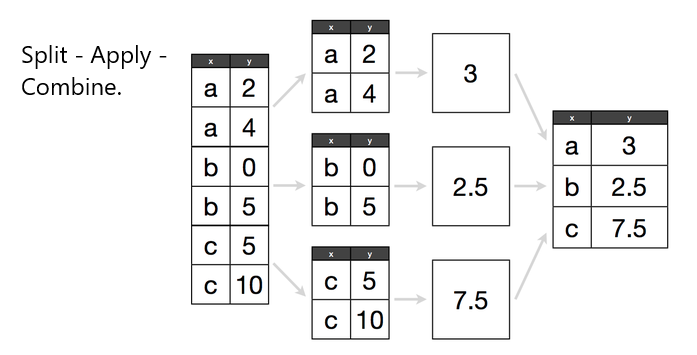

In [263]:
from IPython.core.display import Image
Image('c:/Users/jpsabini/Pictures/Split_Apply_Combine.png',width=500,height=500,embed=True)
#SPLIT APPLY COMBINE

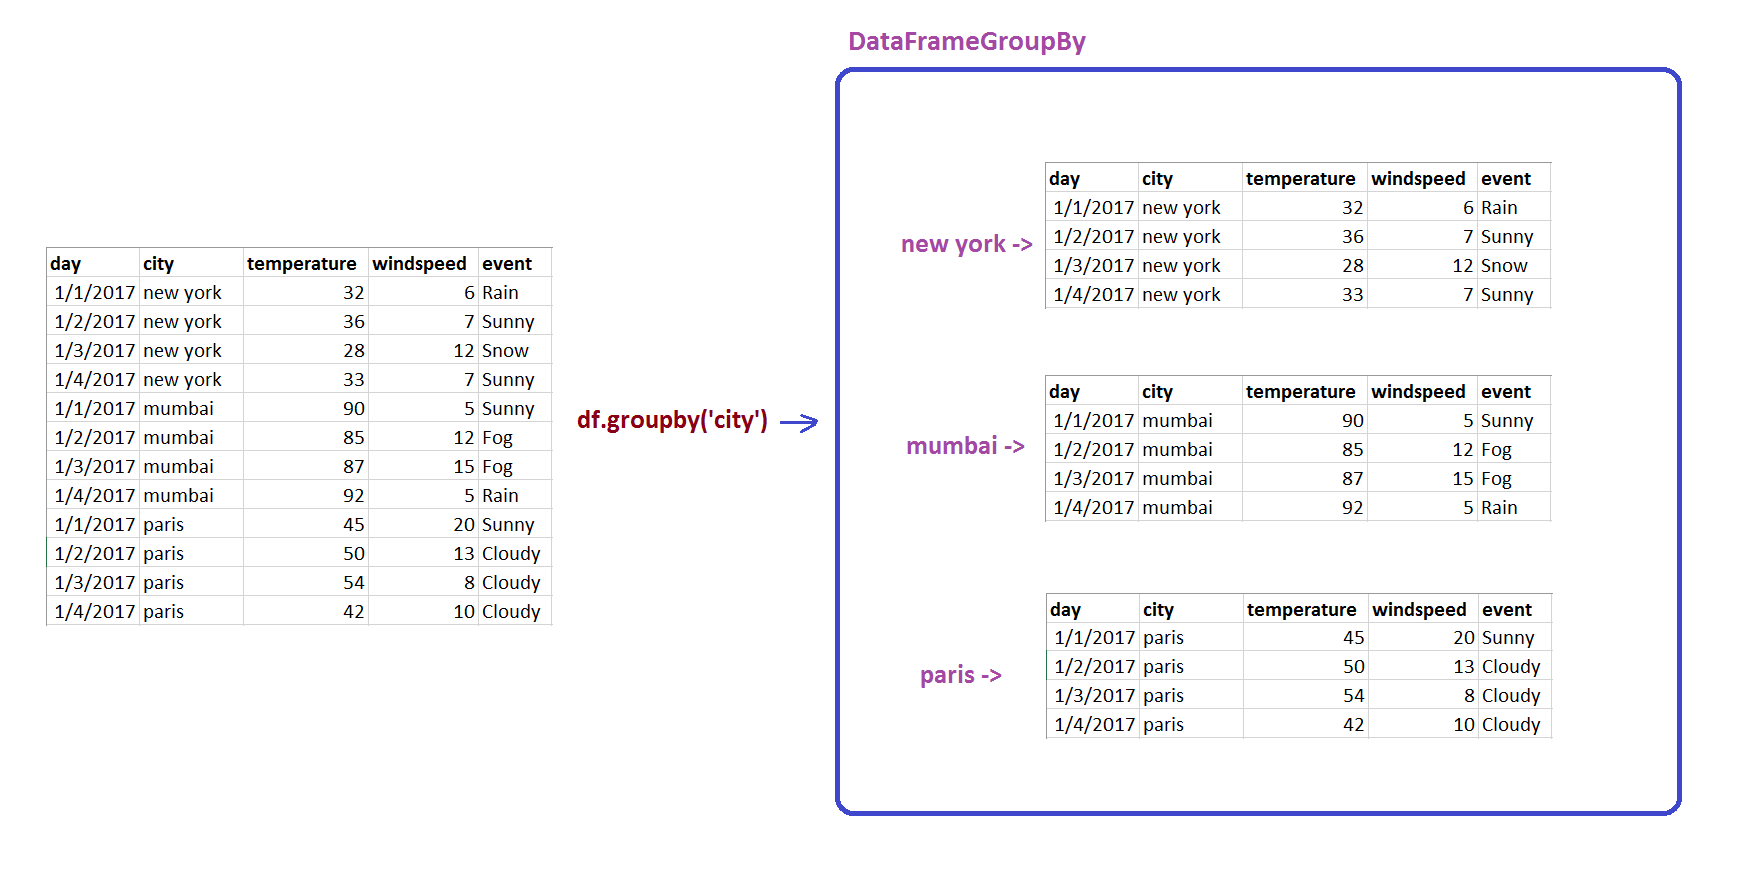

In [376]:
from IPython.core.display import Image
Image('https://raw.githubusercontent.com/JPSabini/py/master/pandas/7_group_by/group_by_cities.png',width=600,height=600,embed=True)

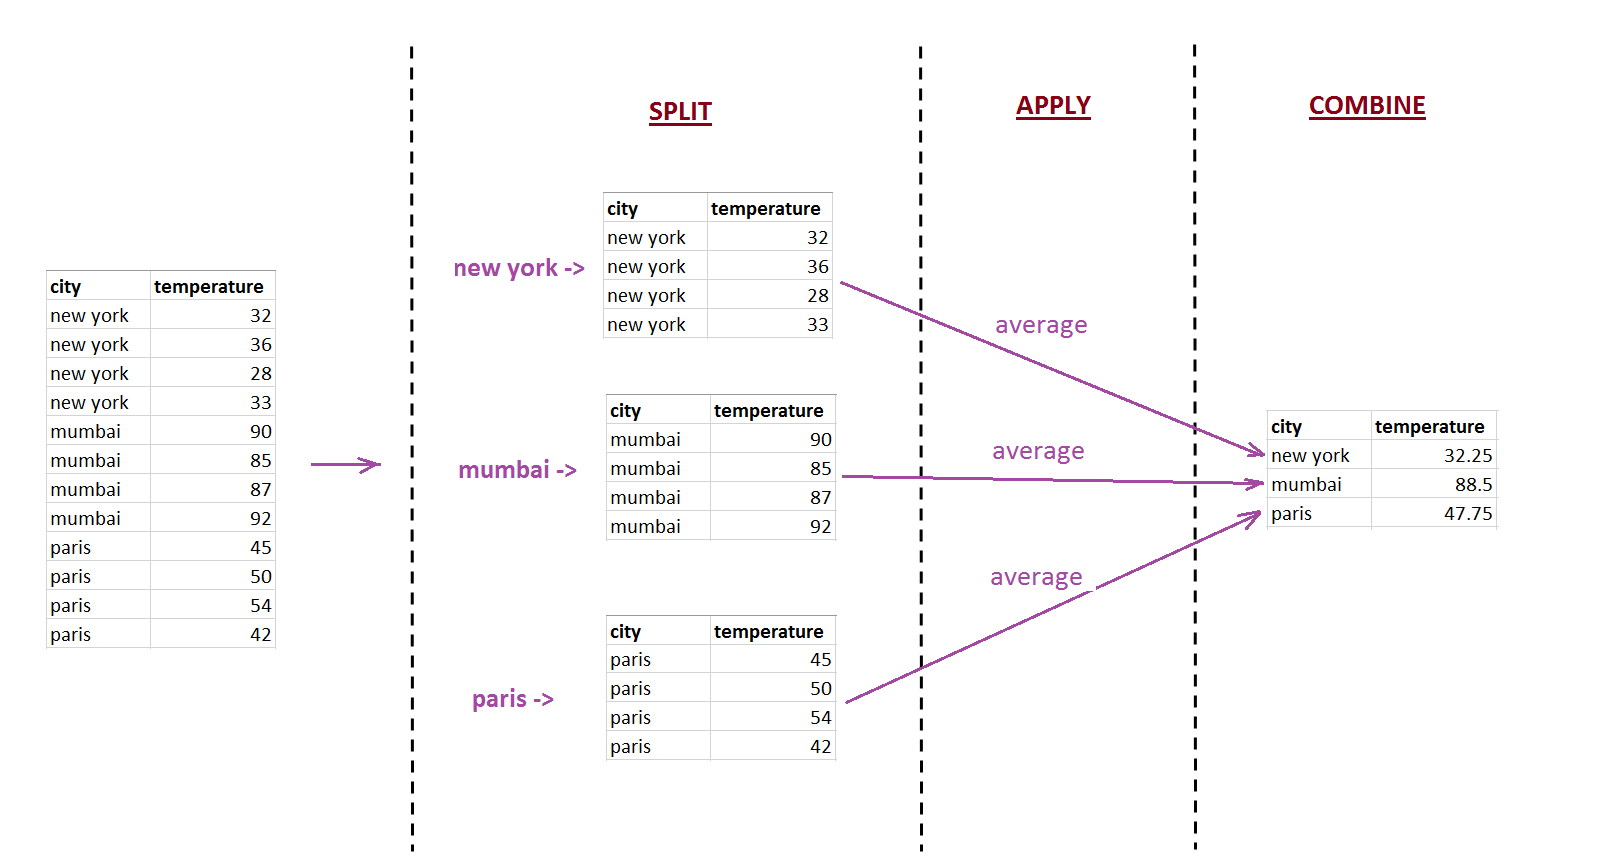

In [398]:
Image('https://raw.githubusercontent.com/JPSabini/py/master/pandas/7_group_by/split_apply_combine.png',width=600,height=600,embed=True)

In [292]:
!curl -O https://raw.githubusercontent.com/JPSabini/py/master/pandas/7_group_by/weather_by_cities.csv

%pwd

C:\Users\jpsabini\DataAnalysis_2ed\pydata-book


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   367  100   367    0     0    367      0  0:00:01 --:--:--  0:00:01  2133


'C:\\Users\\jpsabini\\DataAnalysis_2ed\\pydata-book'

In [293]:
df = pd.read_csv("C:\\Users\\jpsabini\\DataAnalysis_2ed\\pydata-book\\weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


### For this dataset, get following answers,
#### 1. What was the maximum temperature in each of these 3 cities?
#### 2. What was the average windspeed in each of these 3 cities?

In [367]:
g = df.groupby("city")
g.groups

{'mumbai': Int64Index([4, 5, 6, 7], dtype='int64'),
 'new york': Int64Index([0, 1, 2, 3], dtype='int64'),
 'paris': Int64Index([8, 9, 10, 11], dtype='int64')}

In [370]:
for city, data in g:
    print("city:",city,end='\n')
    print("\n")
    print("data:",data)

city: mumbai


data:         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
city: new york


data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
city: paris


data:          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [362]:
gdate = df.groupby("day") 

In [365]:
#Iterating over groups Possibly on exam
for day, data in gdate:
    print("day:",day)
    print("\n")
    print("data:",data)

day: 1/1/2017


data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
4  1/1/2017    mumbai           90          5  Sunny
8  1/1/2017     paris           45         20  Sunny
day: 1/2/2017


data:         day      city  temperature  windspeed   event
1  1/2/2017  new york           36          7   Sunny
5  1/2/2017    mumbai           85         12     Fog
9  1/2/2017     paris           50         13  Cloudy
day: 1/3/2017


data:          day      city  temperature  windspeed   event
2   1/3/2017  new york           28         12    Snow
6   1/3/2017    mumbai           87         15     Fog
10  1/3/2017     paris           54          8  Cloudy
day: 1/4/2017


data:          day      city  temperature  windspeed   event
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
11  1/4/2017     paris           42         10  Cloudy


### Similar to SQL 
Select * from weather_by_city <br>
group_by city

In [372]:
g.get_group('mumbai') # the get method

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [396]:
g.get_group('mumbai').max() #a series ON EXAM

day            1/4/2017
event             Sunny
temperature          92
windspeed            15
dtype: object

Here we've selected a particular Series group from the original DataFrame group by reference to its column name. As with the GroupBy object, no computation is done until we call some aggregate on the object:

In [373]:
g.max() #max seems to permit max alphabet-lexicographical order ON EXAM

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [374]:
g.mean()#mean aggregate for the whole NUMERICAL data group ON EXAM

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [ ]:
#multiples groups

In [388]:
g3=df[['temperature','windspeed']].groupby([df["day"],df["city"]])

In [389]:
g3

In [391]:
means=g3.mean()

In [395]:
means

temperature  windspeed
day      city                            
1/1/2017 mumbai             90          5
         new york           32          6
         paris              45         20
1/2/2017 mumbai             85         12
         new york           36          7
         paris              50         13
1/3/2017 mumbai             87         15
         new york           28         12
         paris              54          8
1/4/2017 mumbai             92          5
         new york           33          7
         paris              42         10

In [394]:
means.unstack() # NOT ON EXAM

temperature                windspeed               
city          mumbai new york paris    mumbai new york paris
day                                                         
1/1/2017          90       32    45         5        6    20
1/2/2017          85       36    50        12        7    13
1/3/2017          87       28    54        15       12     8
1/4/2017          92       33    42         5        7    10


The GroupBy object

The GroupBy object is a very flexible abstraction. In many ways, you can simply treat it as if it's a collection of DataFrames, and it does the difficult things under the hood. 

Perhaps the most important operations made available by a GroupBy are aggregate, filter, transform, and apply.


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

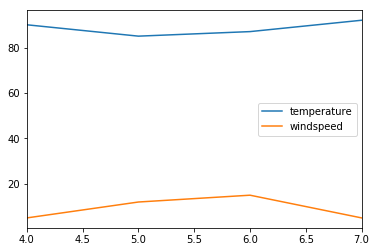

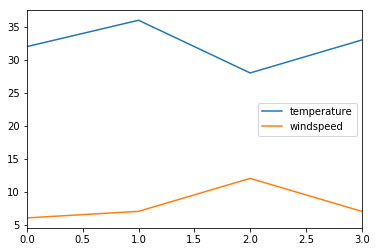

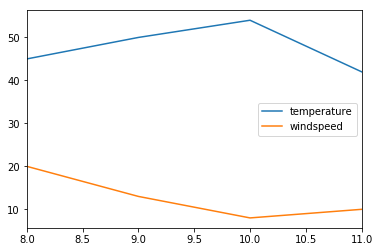

In [400]:
import matplotlib.pyplot as plt
%matplotlib inline
g.plot()

city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

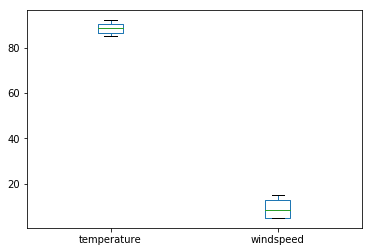

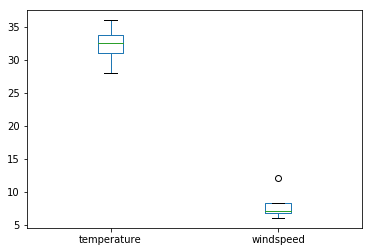

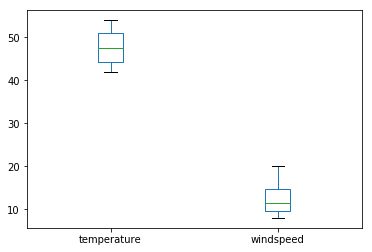

In [407]:
g.plot(kind="box")